In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from boosting import Boosting

In [2]:
#Recta que queremos encontrar
def plane(X,Y,a,b,c):
    return a * X + b * Y + c

#Agregar ruido
def noise(Z, scale=0.5):
    noise = np.random.normal(0, scale, Z.shape)
    return Z + noise

def normalize(data,responses):
    y = responses - responses.mean()

    X = data - data.mean()

    X = X/np.linalg.norm(X, axis=0)
    return X, y

In [123]:
X = np.linspace(0, 10, 100).reshape(-1, 1)
Y = 2 * X + np.random.normal(0, 0.1, size=X.shape)
Z = plane(X, Y, 0, 7, 9)
Z_noisy = noise(Z)

In [124]:
df_data = pd.DataFrame({'X': X.flatten(), 'Y': Y.flatten()})
df_results = pd.DataFrame({'Z_noisy': Z_noisy.flatten()})

In [125]:
X, y = normalize(df_data, df_results['Z_noisy'])
model = LinearRegression().fit(X, y)

In [126]:
print("Coeficientes del modelo:")
print(f"Pendiente: {model.coef_}\nSuma de los coeficientes: {np.sum(model.coef_)}")
print(f"Interseccion: {model.intercept_}")
print(f"Score R^2: {model.score(X, y)}")

Coeficientes del modelo:
Pendiente: [-13.50418691 423.55642668]
Suma de los coeficientes: 410.05223976482273
Interseccion: -1.0953521127373108e-14
Score R^2: 0.9998889196996352


In [158]:
boosting_model = Boosting(X.values, y.values)

b_ls = boosting_model.LS_Boost(numiter=100000, epsilon=1)

print("\nCoeficientes del modelo LS-Boost:")
print("Pendiente:", b_ls)


Coeficientes del modelo LS-Boost:
Pendiente: [-13.50380676 423.55604648]


Revision del algoritmo:

In [90]:
def LS_Boostaca(data,response, numiter=100, epsilon=0.1):
        """
        LS-Boost algorithm for linear regression boosting.
        Parameters:
            X: Data matrix of size (n, p).
            y: Response vector of size (n,).
            numiter: Number of algorithm iterations, default 100.
            epsilon: Learning rate, default 0.1.
        Returns:
            b: Regression coefficient vector of size (p,).
        """
        if epsilon <= 0:
            raise ValueError("The epsilon parameter must be positive.")
        
        else:
            r, b = response.copy(), np.zeros(data.shape[1])

            print(f"Starting LS-Boost algorithm with residuals {r} and coefficients {b}")

            #diccionarios para guardar la evolucion
            j = []
            u_m1 = {f"iteracion {i}":[] for i in range(numiter+1)}
            res1 = {f"iteracion {i}":[] for i in range(numiter+1)}

            for it in range(numiter+1):

                u_m = [np.dot(data[:, m], r) 
                       for m in range(data.shape[1])]
                u_m1[f"iteracion {it}"] = u_m.copy()

                res = [np.sum((r - u_m[m] * data[:, m])**2) 
                       for m in range(data.shape[1])]
                res1[f"iteracion {it}"] = res.copy()
                
                j_k = np.argmin(res)
                j.append(j_k)

                r -= epsilon * data[:, j_k] * u_m[j_k]
                b[j_k] += epsilon * u_m[j_k]

        return b, j, u_m1, res1

Starting LS-Boost algorithm with residuals [-61.69537827 -60.83819368 -60.88495929 -57.57799836 -58.57748507
 -56.26847269 -54.93135656 -53.17909146 -53.08640884 -50.45966634
 -49.34511274 -48.56222387 -48.86968515 -46.74987644 -44.32231624
 -46.32051695 -42.30405338 -41.58468295 -38.7667013  -37.61663682
 -37.80720934 -35.11961631 -35.23338255 -34.71061094 -32.10416094
 -31.32704388 -28.95067725 -29.19046379 -27.23972283 -24.68325977
 -25.44327341 -24.63417148 -21.31777033 -21.32237584 -18.43136882
 -17.56569988 -16.62842046 -15.42735709 -14.06618822 -13.13531018
 -11.26467499 -11.15742308  -7.61264619  -7.45377053  -6.816518
  -6.94442322  -4.87396378  -3.83654139  -1.6144917   -0.75803903
   0.74149673   1.70156942   3.93176322   4.45141556   5.4833508
   5.61623739   8.39014211   8.45055157   9.13473557  11.59777137
  14.30731725  14.23480897  16.85971276  17.18391887  17.34174877
  19.02085946  21.93869317  21.38086377  23.48113866  25.60348584
  26.18086117  27.19588305  28.11723

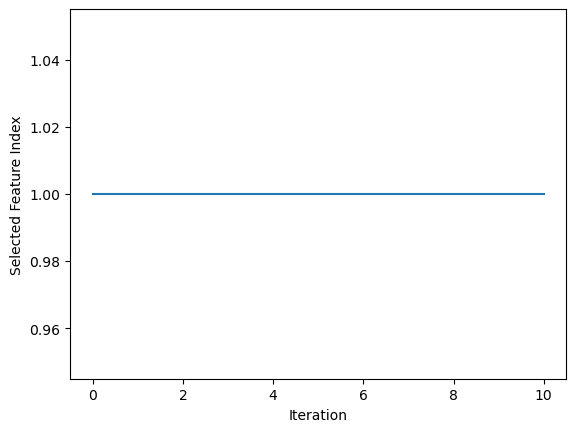

array([ 0.        , 38.20275839])

In [99]:
b,j, u_m1, res1 = LS_Boostaca(X.values, y.values, numiter=10, epsilon=0.01)

plt.plot(range(len(j)), j)
plt.xlabel('Iteration')
plt.ylabel('Selected Feature Index')   
plt.show()
b

In [ ]:
u_m11 =[list(u_m1.values())[i][0] for i in range(len(u_m1))]
plt.plot(range(len(u_m11)), u_m11)
plt.xlabel('Iteration')
plt.ylabel('u_m1 Values')
plt.show()

In [ ]:
u_m12 =[list(u_m1.values())[i][1] for i in range(len(u_m1))]
plt.plot(range(len(u_m12)), u_m12)
plt.xlabel('Iteration') 
plt.show()

In [ ]:
u_m11 =[list(res1.values())[i][0] for i in range(len(res1))]
plt.plot(range(len(u_m11)), u_m11)
plt.xlabel('Iteration')
plt.ylabel('u_m1 Values')
plt.show()

u_m12 =[list(res1.values())[i][1] for i in range(len(res1))]
plt.plot(range(len(u_m12)), u_m12)
plt.xlabel('Iteration')
plt.ylabel('u_m2 Values')
plt.show()